In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_moons

# Dropout (regression)

In [10]:
# Generate Data for Regression
X_train = np.linspace(-1, 1, 20)
y_train = np.array([-0.6561 , -0.3099 , -0.59035, -0.50855, -0.285  ,
                    -0.2443 , -0.02445,  0.00135, -0.2006 ,  0.07475,
                    -0.1422 ,  0.06515,  0.15265,  0.3521 ,  0.28415,
                    0.5524 ,  0.23115,  0.20835, 0.4211,  0.60485])
X_test = np.linspace(-1, 1, 20)

In [11]:
# Regression Without Dropout
model_no_dropout = Sequential([
    Dense(128, input_dim=1, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# Compile the model
model_no_dropout.compile(optimizer=Adam(learning_rate=0.01), loss='mse')


In [13]:
# Train the model
history_no_dropout = model_no_dropout.fit(X_train, y_train, epochs=500, verbose=0)


In [14]:
# Evaluate the model on the test data
y_pred_no_dropout = model_no_dropout.predict(X_test)
mse_no_dropout = mean_squared_error(y_train, y_pred_no_dropout)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [15]:
# Regression With Dropout
model_dropout = Sequential([
    Dense(128, input_dim=1, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
# Compile the model
model_dropout.compile(optimizer=Adam(learning_rate=0.01), loss='mse')


In [17]:
# Train the model
history_dropout = model_dropout.fit(X_train, y_train, epochs=500, verbose=0)


In [18]:
# Evaluate the model on the test data
y_pred_dropout = model_dropout.predict(X_test)
mse_dropout = mean_squared_error(y_train, y_pred_dropout)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


In [19]:
# Plotting the Regression Results
plt.figure(figsize=(14, 6))

<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

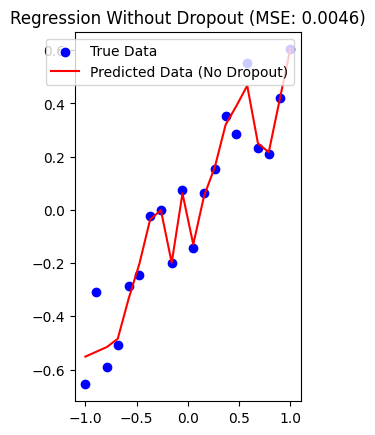

In [20]:
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='True Data')
plt.plot(X_test, y_pred_no_dropout, color='red', label='Predicted Data (No Dropout)')
plt.title(f'Regression Without Dropout (MSE: {mse_no_dropout:.4f})')
plt.legend()


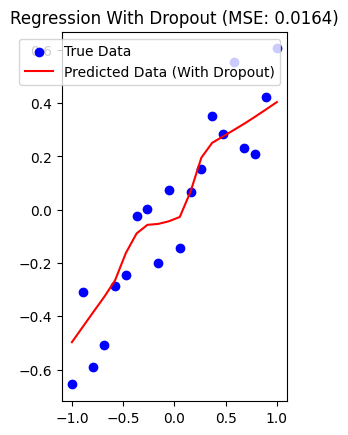

In [21]:
plt.subplot(1, 2, 2)
plt.scatter(X_train, y_train, color='blue', label='True Data')
plt.plot(X_test, y_pred_dropout, color='red', label='Predicted Data (With Dropout)')
plt.title(f'Regression With Dropout (MSE: {mse_dropout:.4f})')
plt.legend()

In [22]:
plt.show()

# Dropout (classification)

In [23]:
# Generate Data for Classification
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [24]:
# Classification Without Dropout
model_no_dropout = Sequential([
    Dense(128, input_dim=2, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
# Compile the model
model_no_dropout.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


In [26]:
# Train the model
history_no_dropout = model_no_dropout.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))


In [27]:
# Evaluate the model on the test data
loss_no_dropout, accuracy_no_dropout = model_no_dropout.evaluate(X_test, y_test)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9794 - loss: 0.0542 


In [28]:
# Classification With Dropout
model_dropout = Sequential([
    Dense(128, input_dim=2, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [29]:
# Compile the model
model_dropout.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])


In [30]:
# Train the model
history_dropout = model_dropout.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))


In [31]:
# Evaluate the model on the test data
loss_dropout, accuracy_dropout = model_dropout.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9906 - loss: 0.0445 


In [32]:
# Plotting the Classification Results
plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

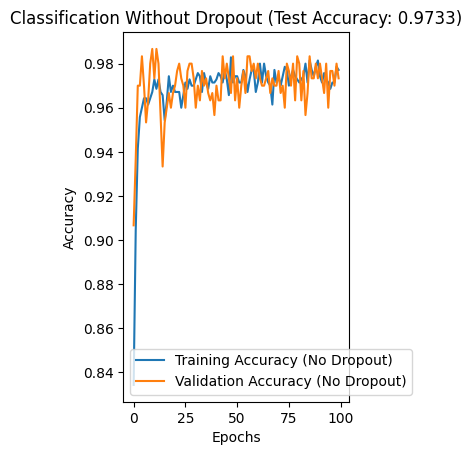

In [33]:
plt.subplot(1, 2, 1)
plt.plot(history_no_dropout.history['accuracy'], label='Training Accuracy (No Dropout)')
plt.plot(history_no_dropout.history['val_accuracy'], label='Validation Accuracy (No Dropout)')
plt.title(f'Classification Without Dropout (Test Accuracy: {accuracy_no_dropout:.4f})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

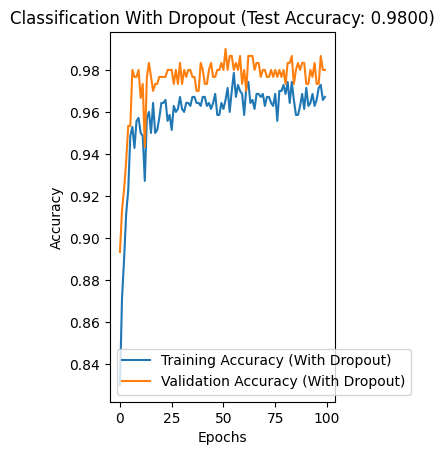

In [34]:
plt.subplot(1, 2, 2)
plt.plot(history_dropout.history['accuracy'], label='Training Accuracy (With Dropout)')
plt.plot(history_dropout.history['val_accuracy'], label='Validation Accuracy (With Dropout)')
plt.title(f'Classification With Dropout (Test Accuracy: {accuracy_dropout:.4f})')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()